Title: Supervised Learning 

Task 1: Identify input-output pairs in a dataset of housing prices.

In [10]:
# Write your code here

import pandas as pd
import numpy as np

# --- 1. Load your Dataset (or generate synthetic data) ---
# For demonstration, we'll generate the same synthetic data as before.
# If you have a real CSV, replace this with:
# df = pd.read_csv('your_housing_data.csv')
np.random.seed(42) # for reproducibility

SIZE_COLUMN_NAME = 'Size_sqft'
PRICE_COLUMN_NAME = 'Price'

house_size = np.random.uniform(800, 3000, 100) # Flattened for DataFrame creation
price_per_sqft = 150
base_price = 50000
noise = np.random.normal(0, 30000, 100)

house_price = (house_size * price_per_sqft) + base_price + noise

df = pd.DataFrame({
    SIZE_COLUMN_NAME: house_size,
    PRICE_COLUMN_NAME: house_price,
    'Bedrooms': np.random.randint(2, 6, 100), # Adding another feature
    'Neighborhood_Score': np.random.uniform(1, 10, 100) # Another feature
})

print("Full Dataset Sample (first 5 rows):")
print(df.head())
print(f"\nFull Dataset Shape: {df.shape} (rows, columns)")

# --- 2. Identify and Separate Inputs (Features) and Output (Target) ---

# Define the input features (independent variables)
# X should typically be a DataFrame (even for a single feature)
# If predicting solely on size:
X = df[[SIZE_COLUMN_NAME]]

# If predicting on multiple features (e.g., size, bedrooms, neighborhood score):
# X = df[[SIZE_COLUMN_NAME, 'Bedrooms', 'Neighborhood_Score']]

# Define the output target (dependent variable)
# y is typically a Series (single column)
y = df[PRICE_COLUMN_NAME]

print("\n--- Identified Input-Output Pairs ---")
print(f"\nInputs (X) - Features Sample (first 5 rows):")
print(X.head())
print(f"Inputs (X) Shape: {X.shape}") # (number_of_samples, number_of_features)

print(f"\nOutput (y) - Target Sample (first 5 values):")
print(y.head())
print(f"Output (y) Shape: {y.shape}") # (number_of_samples,)

Full Dataset Sample (first 5 rows):
     Size_sqft          Price  Bedrooms  Neighborhood_Score
0  1623.988261  296209.651267         3            9.010048
1  2891.571474  474765.500601         2            4.041956
2  2410.386672  414310.824094         3            4.380247
3  2117.048665  307930.232347         2            1.845837
4  1143.241009  214895.994711         5            6.204521

Full Dataset Shape: (100, 4) (rows, columns)

--- Identified Input-Output Pairs ---

Inputs (X) - Features Sample (first 5 rows):
     Size_sqft
0  1623.988261
1  2891.571474
2  2410.386672
3  2117.048665
4  1143.241009
Inputs (X) Shape: (100, 1)

Output (y) - Target Sample (first 5 values):
0    296209.651267
1    474765.500601
2    414310.824094
3    307930.232347
4    214895.994711
Name: Price, dtype: float64
Output (y) Shape: (100,)


Task 2: Match labeled images to their correct classifications.

Dataset shape: (1797, 64) (number of images, number of features/pixels)
Image shape: 8x8 pixels
Number of target classes (digits): 10
Example target names: [0 1 2 3 4 5 6 7 8 9]


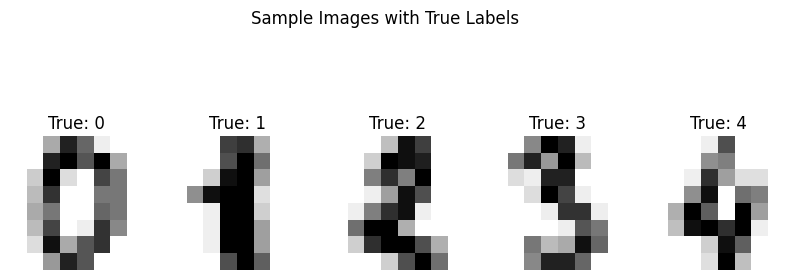


Training data shape: X_train=(1437, 64), y_train=(1437,)
Testing data shape: X_test=(360, 64), y_test=(360,)

Training the K-Nearest Neighbors Classifier...
Model training complete.

--- Model Evaluation ---
Accuracy Score: 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0

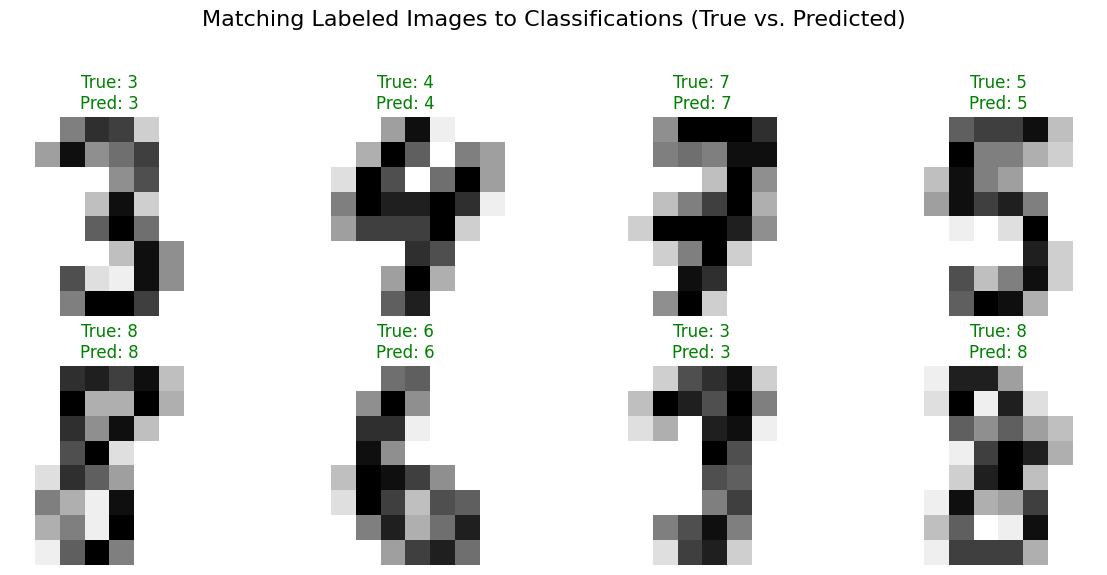


--- Matching Complete ---
The plot above shows selected test images with their true labels and the labels predicted by the model.
Green title indicates a correct match, red indicates a mismatch.


In [11]:
# Write your code here

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # A simple yet effective classifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# --- 1. Load the Dataset (Scikit-learn's Digits Dataset) ---
# This dataset contains 8x8 pixel images of handwritten digits (0-9).
digits = datasets.load_digits()

# --- 2. Data Preprocessing & Understanding the Data ---
# Images are stored as arrays.
# digits.images contains the 2D (8x8) image data.
# digits.data contains the flattened (64-pixel long) feature vectors.
# digits.target contains the labels (0-9).

print(f"Dataset shape: {digits.data.shape} (number of images, number of features/pixels)")
print(f"Image shape: {digits.images.shape[1]}x{digits.images.shape[2]} pixels")
print(f"Number of target classes (digits): {len(digits.target_names)}")
print(f"Example target names: {digits.target_names}")

# Display a few sample images and their actual labels
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {label}')
    plt.axis('off')
plt.suptitle('Sample Images with True Labels')
plt.show()

# --- 3. Split Data into Training and Testing Sets ---
X = digits.data # Features (flattened pixel values)
y = digits.target # Target (the actual digit)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 4. Choose and Train a Model (K-Nearest Neighbors Classifier) ---
# KNeighborsClassifier is a simple, non-parametric classification algorithm.
# n_neighbors specifies the number of neighbors to consider.
classifier = KNeighborsClassifier(n_neighbors=5)

print("\nTraining the K-Nearest Neighbors Classifier...")
classifier.fit(X_train, y_train)
print("Model training complete.")

# --- 5. Make Predictions on the Test Set ---
y_pred = classifier.predict(X_test)

# --- 6. Evaluate the Model ---
print("\n--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in digits.target_names]))

# --- 7. Visualize Matching: Display Images with True vs. Predicted Labels ---
# Select a few random samples from the test set to visualize
num_samples_to_show = 8
sample_indices = np.random.choice(len(X_test), num_samples_to_show, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(sample_indices):
    image_data = X_test[index].reshape(8, 8) # Reshape flattened data back to 8x8 for display
    true_label = y_test[index]
    predicted_label = y_pred[index]

    plt.subplot(2, 4, i + 1) # 2 rows, 4 columns
    plt.imshow(image_data, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {true_label}\nPred: {predicted_label}',
              color='green' if true_label == predicted_label else 'red')
    plt.axis('off')

plt.suptitle('Matching Labeled Images to Classifications (True vs. Predicted)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\n--- Matching Complete ---")
print("The plot above shows selected test images with their true labels and the labels predicted by the model.")
print("Green title indicates a correct match, red indicates a mismatch.")

Task 3: List potential inputs and outputs for predicting stock prices.

In [12]:
# Write your code from here

import pandas as pd
import numpy as np # For potential target transformation

# --- Assume 'df' is your historical stock data DataFrame ---
# It would typically have columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
# and potentially other features you've engineered or collected.

# Example synthetic DataFrame for demonstration:
# In a real scenario, you'd load from CSV: df = pd.read_csv('your_stock_data.csv')
data = {
    'Date': pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='B')),
    'Open': np.random.uniform(100, 110, 100),
    'High': np.random.uniform(105, 115, 100),
    'Low': np.random.uniform(95, 105, 100),
    'Close': np.random.uniform(98, 112, 100),
    'Volume': np.random.randint(1_000_000, 5_000_000, 100),
}
df = pd.DataFrame(data).set_index('Date')

# --- Feature Engineering Example (creating a couple of common technical indicators) ---
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['RSI_14'] = np.random.uniform(30, 70, 100) # Placeholder, actual calculation is more complex
df['Prev_Close'] = df['Close'].shift(1) # Previous day's close

# Drop rows with NaN values created by rolling windows or shifting
df.dropna(inplace=True)

print("Sample DataFrame with potential features:")
print(df.head())
print(f"\nDataFrame shape: {df.shape}")

# --- 1. Define the Output (Target Variable - y) ---
# Option A: Predict the next day's closing price
# y = df['Close'].shift(-1)

# Option B: Predict the next day's percentage change in close price
y = (df['Close'].pct_change() * 100).shift(-1)

# Option C: Predict the direction (Up/Down/No Change for classification)
# For a binary classification (Up or Down, excluding no change)
# y = (df['Close'].diff().shift(-1) > 0).astype(int) # 1 if up, 0 if down/flat

# Drop the last row of y, as its corresponding X would be NaN (no next day to predict)
y = y.dropna()

print(f"\nSelected Output (y) - Type: {y.name} (first 5 values):")
print(y.head())
print(f"Output (y) shape: {y.shape}")

# --- 2. Define the Inputs (Features - X) ---
# Select the columns you want to use as input features.
# Make sure to exclude the target variable itself and any future information!
features_to_use = [
    'Open', 'High', 'Low', 'Close', 'Volume', # Raw prices
    'SMA_10', 'RSI_14', # Technical Indicators
    'Prev_Close' # Lagged value
    # Add other features if you had them, e.g., 'Earnings_Per_Share', 'Inflation_Rate'
]

X = df[features_to_use]

# Align X and y. If y was shifted, X needs to correspond to the period *before* the target.
# If y was `shift(-1)`, then the last row of X needs to be dropped as there's no corresponding y.
# If y was `dropna()`, then X must be aligned by index.
X = X.loc[y.index] # Align X to the index of y after y.dropna()

print(f"\nSelected Inputs (X) - Features Sample (first 5 rows):")
print(X.head())
print(f"Inputs (X) shape: {X.shape}")

# Verify that X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    print("\nWarning: X and y do not have the same number of samples. This indicates a data alignment issue.")
    print(f"X samples: {X.shape[0]}, y samples: {y.shape[0]}")
else:
    print("\nSuccessfully identified and aligned X and y for prediction.")


Sample DataFrame with potential features:
                  Open        High         Low       Close   Volume  \
Date                                                                  
2023-01-13  105.577423  112.305491  102.997820  106.026121  4271069   
2023-01-16  105.865354  111.937176   98.493870  109.733497  2020154   
2023-01-17  105.644585  106.667308   99.682318  103.661341  3913014   
2023-01-18  103.787726  113.786291  101.249760  108.792759  4876620   
2023-01-19  103.374468  109.954236   98.777259  103.908505  3649228   

                SMA_10     RSI_14  Prev_Close  
Date                                           
2023-01-13  103.852789  45.849681  104.919834  
2023-01-16  104.017855  60.329539  106.026121  
2023-01-17  104.434779  57.840825  109.733497  
2023-01-18  105.318029  36.155836  103.661341  
2023-01-19  105.539722  62.633325  108.792759  

DataFrame shape: (91, 8)

Selected Output (y) - Type: Close (first 5 values):
Date
2023-01-13    3.496663
2023-01-16   -5.5

Notebook Initialization Complete.
----------------------------------------------------------------------------------------------------
## Task 1: Implementing Simple Linear Regression
### Objective: Predict house prices based on house size.
Generated synthetic dataset for house prices.
Assumption: House price is linearly dependent on size, with some random noise.

Dataset sample (first 5 rows):
     Size_sqft          Price
0  1623.988261  296209.651267
1  2891.571474  474765.500601
2  2410.386672  414310.824094
3  2117.048665  307930.232347
4  1143.241009  214895.994711

Dataset shape: (100, 2) (rows, columns)

Feature 'Size_sqft' (X) data type: float64
Target 'Price' (y) data type: float64

Training data shape: X_train=(80, 1), y_train=(80,)
Testing data shape: X_test=(20, 1), y_test=(20,)

--- Model Training Complete ---
Model Intercept (c): 58665.79
Model Coefficient (m - price per sqft): 144.53

--- Model Evaluation ---
Mean Absolute Error (MAE): $17,740.28
Mean Squared Error (MSE

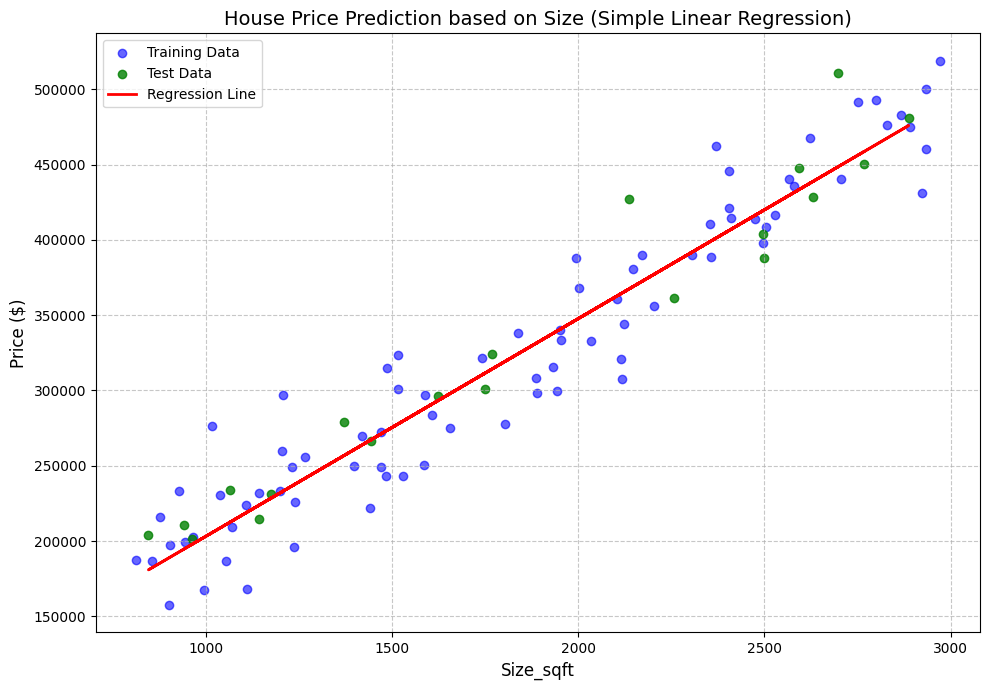


Predicted price for a 1800 sq. ft. house: $318,814.41

----------------------------------------------------------------------------------------------------
## Task 2: Image Classification and Matching
### Objective: Train a classifier to match handwritten digits to their correct labels.
Using Scikit-learn's built-in Digits dataset for demonstration.

Dataset shape: (1797, 64) (number of images, number of features/pixels)
Image shape: 8x8 pixels
Number of target classes (digits): 10


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


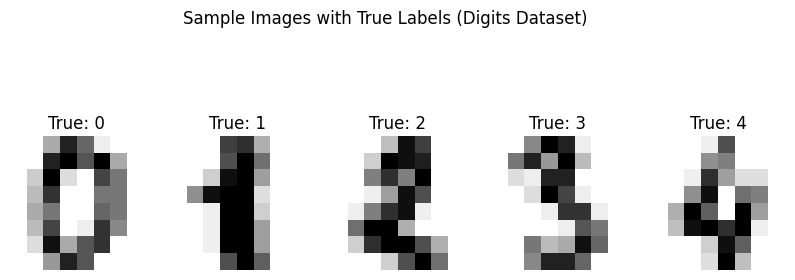


Training data shape (digits): X_train=(1437, 64), y_train=(1437,)
Testing data shape (digits): X_test=(360, 64), y_test=(360,)

Training the Logistic Regression Classifier for Digits...
Model training complete.

--- Model Evaluation (Digits Classifier) ---
Accuracy Score: 0.9611

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.85      0.93      0.89        30
           9       0.97      0.90      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96  

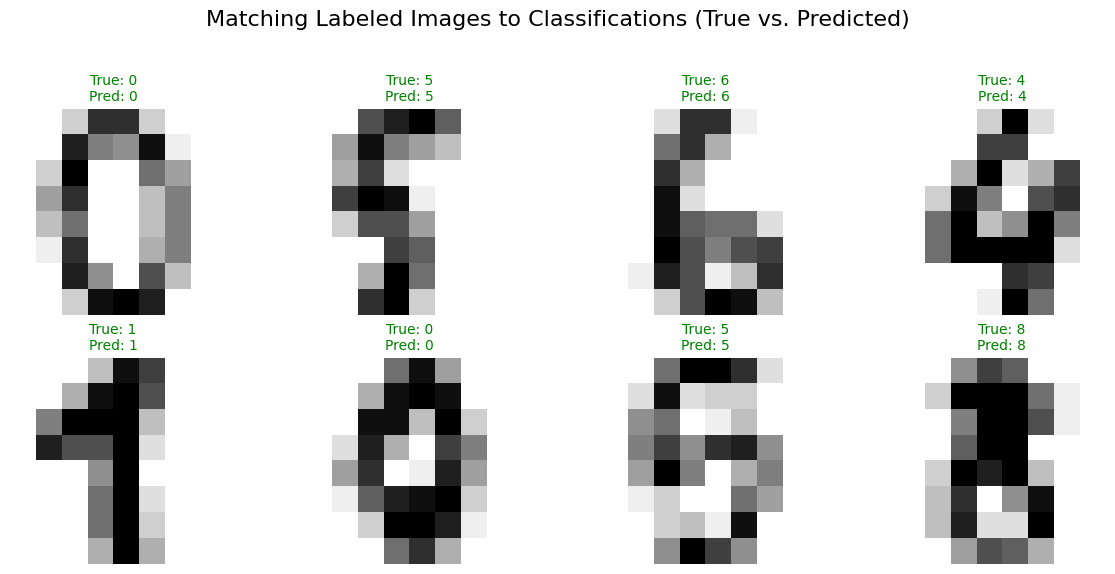


Matching visualization complete. Green title indicates a correct match, red indicates a mismatch.

----------------------------------------------------------------------------------------------------
## Task 3: Identifying Inputs and Outputs for Stock Price Prediction
### Objective: Conceptualize features (inputs) and target variables (outputs) for stock price prediction.

Predicting stock prices is a complex task due to market volatility and many influencing factors.
Here's a breakdown of common inputs (features) and outputs (target variables) used in this domain:

### Output (Target Variable - 'y')
This is what your model aims to predict. Common choices include:
1.  **Next Period's Closing Price:** Predicting the exact price (regression).
    - Example: `df['Close'].shift(-1)`
2.  **Next Period's Price Change (Absolute or Percentage):** Predicting the magnitude or direction of movement (regression/classification).
    - Example: `(df['Close'].pct_change() * 100).shift(-1)` (for perc

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For heatmaps, if needed later
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression # For regression and classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.exceptions import NotFittedError
from sklearn import datasets # For the digits dataset in Task 2
import os

# --- Configuration for the Entire Notebook ---
# Adjust these paths and column names as per your actual dataset
USE_REAL_DATA_FOR_TASK1 = False # Set to True to use a real CSV for Linear Regression (Task 1)
REAL_DATA_PATH_TASK1 = 'your_house_data.csv' # e.g., 'data/housing_prices.csv'
TASK1_SIZE_COLUMN = 'Size_sqft'       # Feature column for Task 1
TASK1_PRICE_COLUMN = 'Price'          # Target column for Task 1

print("Notebook Initialization Complete.")
print("----------------------------------------------------------------------------------------------------")

# --- Task 1: Implementing Simple Linear Regression (House Price Prediction) ---
print("## Task 1: Implementing Simple Linear Regression")
print("### Objective: Predict house prices based on house size.")

# --- 1.1 Data Loading or Generation ---
df_house = None
try:
    if USE_REAL_DATA_FOR_TASK1:
        if not os.path.exists(REAL_DATA_PATH_TASK1):
            raise FileNotFoundError(f"The specified data file was not found: {REAL_DATA_PATH_TASK1}")
        df_house = pd.read_csv(REAL_DATA_PATH_TASK1)
        print(f"Successfully loaded data from '{REAL_DATA_PATH_TASK1}'.")

        # Basic check for required columns in real data
        if TASK1_SIZE_COLUMN not in df_house.columns:
            raise ValueError(f"Required column '{TASK1_SIZE_COLUMN}' not found in the dataset.")
        if TASK1_PRICE_COLUMN not in df_house.columns:
            raise ValueError(f"Required column '{TASK1_PRICE_COLUMN}' not found in the dataset.")

    else:
        # Generate synthetic data for demonstration
        np.random.seed(42) # for reproducibility
        house_size = np.random.uniform(800, 3000, 100).reshape(-1, 1)
        price_per_sqft = 150
        base_price = 50000
        # Adding noise to simulate real-world variability
        # The noise is normally distributed around 0, adding realism to the linear trend.
        noise = np.random.normal(0, 30000, 100).reshape(-1, 1)
        house_price = (house_size * price_per_sqft) + base_price + noise
        df_house = pd.DataFrame({TASK1_SIZE_COLUMN: house_size.flatten(), TASK1_PRICE_COLUMN: house_price.flatten()})
        print("Generated synthetic dataset for house prices.")
        print("Assumption: House price is linearly dependent on size, with some random noise.")

    print("\nDataset sample (first 5 rows):")
    print(df_house.head())
    print(f"\nDataset shape: {df_house.shape} (rows, columns)")

except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please check your 'REAL_DATA_PATH_TASK1'.")
    # You might want to exit or provide a fallback here
    df_house = None # Ensure df_house is None if loading fails
except pd.errors.EmptyDataError:
    print(f"Error: The file '{REAL_DATA_PATH_TASK1}' is empty or contains no data.")
    df_house = None
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file '{REAL_DATA_PATH_TASK1}': {e}.")
    print("Please check for malformed CSV, incorrect delimiter, or encoding issues.")
    df_house = None
except ValueError as e:
    print(f"Data validation error: {e}")
    df_house = None
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    df_house = None

if df_house is not None:
    # --- 1.2 Data Preparation and Type Validation ---
    try:
        X = df_house[[TASK1_SIZE_COLUMN]] # Features (independent variable) - must be 2D
        y = df_house[TASK1_PRICE_COLUMN]  # Target (dependent variable) - can be 1D

        # Validate that features and target are numerical
        if not pd.api.types.is_numeric_dtype(X[TASK1_SIZE_COLUMN]):
            raise TypeError(f"Feature column '{TASK1_SIZE_COLUMN}' is not numeric ({X[TASK1_SIZE_COLUMN].dtype}). Please ensure it contains only numbers.")
        if not pd.api.types.is_numeric_dtype(y):
            raise TypeError(f"Target column '{TASK1_PRICE_COLUMN}' is not numeric ({y.dtype}). Please ensure it contains only numbers.")

        # Handle potential NaN values by dropping rows for simplicity in this model
        # For more advanced imputation, refer to previous Q6
        original_rows = X.shape[0]
        # Create a combined dataframe for dropping NaNs to ensure X and y remain aligned
        combined_df = pd.concat([X, y], axis=1).dropna()
        X = combined_df[[TASK1_SIZE_COLUMN]]
        y = combined_df[TASK1_PRICE_COLUMN]

        rows_dropped = original_rows - X.shape[0]
        if rows_dropped > 0:
            print(f"\nDropped {rows_dropped} rows with missing values in '{TASK1_SIZE_COLUMN}' or '{TASK1_PRICE_COLUMN}'.")

        if X.empty or y.empty:
            raise ValueError("After cleaning, feature or target data is empty. Cannot proceed with training.")

        print(f"\nFeature '{TASK1_SIZE_COLUMN}' (X) data type: {X[TASK1_SIZE_COLUMN].dtype}")
        print(f"Target '{TASK1_PRICE_COLUMN}' (y) data type: {y.dtype}")

    except TypeError as e:
        print(f"Data type error during preparation: {e}")
        X, y = None, None
    except ValueError as e:
        print(f"Data preparation error: {e}")
        X, y = None, None
    except Exception as e:
        print(f"An unexpected error occurred during data preparation: {e}")
        X, y = None, None

    if X is not None and y is not None:
        # --- 1.3 Split Data into Training and Testing Sets ---
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
            print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
        except Exception as e:
            print(f"Error during data splitting: {e}")
            X_train, X_test, y_train, y_test = None, None, None, None

        if X_train is not None:
            # --- 1.4 Create and Train the Linear Regression Model ---
            model = LinearRegression()
            try:
                model.fit(X_train, y_train)
                print("\n--- Model Training Complete ---")
                print(f"Model Intercept (c): {model.intercept_:.2f}")
                print(f"Model Coefficient (m - price per sqft): {model.coef_[0]:.2f}")
            except Exception as e:
                print(f"Error during model training: {e}")
                model = None # Set model to None if training fails

            if model is not None:
                # --- 1.5 Make Predictions on the Test Set ---
                y_pred = None
                try:
                    y_pred = model.predict(X_test)
                except NotFittedError:
                    print("Error: Model has not been fitted yet. Cannot make predictions.")
                except Exception as e:
                    print(f"Error during prediction: {e}")

                if y_pred is not None:
                    # --- 1.6 Evaluate the Model ---
                    try:
                        mae = mean_absolute_error(y_test, y_pred)
                        mse = mean_squared_error(y_test, y_pred)
                        rmse = np.sqrt(mse) # Root Mean Squared Error
                        r2 = r2_score(y_test, y_pred)

                        print("\n--- Model Evaluation ---")
                        print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
                        print(f"Mean Squared Error (MSE): ${mse:,.2f}")
                        print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
                        print(f"R-squared (R²): {r2:.4f}")
                    except Exception as e:
                        print(f"Error during model evaluation: {e}")

                    # --- 1.7 Visualize the Results ---
                    try:
                        plt.figure(figsize=(10, 7))

                        # Plot training data
                        plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
                        # Plot test data
                        plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.8)
                        # Plot the regression line
                        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

                        plt.title('House Price Prediction based on Size (Simple Linear Regression)', fontsize=14)
                        plt.xlabel(f'{TASK1_SIZE_COLUMN}', fontsize=12)
                        plt.ylabel(f'{TASK1_PRICE_COLUMN} ($)', fontsize=12)
                        plt.legend()
                        plt.grid(True, linestyle='--', alpha=0.7)
                        plt.tight_layout()
                        plt.show()

                    except Exception as e:
                        print(f"Error during plotting for Task 1: {e}")

                    # --- 1.8 Example Prediction (Optional) ---
                    try:
                        # Use a range that makes sense for your data
                        example_size = np.array([[1800]])
                        predicted_price = model.predict(example_size)
                        print(f"\nPredicted price for a {example_size[0,0]} sq. ft. house: ${predicted_price[0]:,.2f}")
                    except NotFittedError:
                        print("\nCannot make example prediction: Model was not successfully fitted.")
                    except Exception as e:
                        print(f"\nError during example prediction: {e}")
                else:
                    print("\nSkipping evaluation and visualization for Task 1 due to prediction error.")
            else:
                print("\nSkipping prediction, evaluation, and visualization for Task 1 as model training failed.")
        else:
            print("\nSkipping model training and subsequent steps for Task 1 due to data splitting error.")
    else:
        print("\nSkipping data splitting, training, and subsequent steps for Task 1 due to data preparation error.")
else:
    print("\nSkipping Task 1 execution as dataset could not be loaded or generated successfully.")

print("\n----------------------------------------------------------------------------------------------------")

# --- Task 2: Match Labeled Images to their Correct Classifications ---
print("## Task 2: Image Classification and Matching")
print("### Objective: Train a classifier to match handwritten digits to their correct labels.")
print("Using Scikit-learn's built-in Digits dataset for demonstration.")

try:
    # --- 2.1 Load the Digits Dataset ---
    # This dataset contains 8x8 pixel images of handwritten digits (0-9).
    digits = datasets.load_digits()

    print(f"\nDataset shape: {digits.data.shape} (number of images, number of features/pixels)")
    print(f"Image shape: {digits.images.shape[1]}x{digits.images.shape[2]} pixels")
    print(f"Number of target classes (digits): {len(digits.target_names)}")

    # --- 2.2 Display a few sample images and their actual labels ---
    plt.figure(figsize=(10, 4))
    for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'True: {label}')
        plt.axis('off')
    plt.suptitle('Sample Images with True Labels (Digits Dataset)')
    plt.show()

    # --- 2.3 Prepare Data (Features X and Target y) ---
    X_digits = digits.data # Features (flattened pixel values)
    y_digits = digits.target # Target (the actual digit)

    # --- 2.4 Split Data into Training and Testing Sets ---
    X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
        X_digits, y_digits, test_size=0.2, random_state=42
    )
    print(f"\nTraining data shape (digits): X_train={X_train_digits.shape}, y_train={y_train_digits.shape}")
    print(f"Testing data shape (digits): X_test={X_test_digits.shape}, y_test={y_test_digits.shape}")

    # --- 2.5 Choose and Train a Model (Logistic Regression for simplicity) ---
    # Logistic Regression is a good baseline for classification tasks.
    classifier = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence
    print("\nTraining the Logistic Regression Classifier for Digits...")
    classifier.fit(X_train_digits, y_train_digits)
    print("Model training complete.")

    # --- 2.6 Make Predictions on the Test Set ---
    y_pred_digits = classifier.predict(X_test_digits)

    # --- 2.7 Evaluate the Model ---
    print("\n--- Model Evaluation (Digits Classifier) ---")
    print(f"Accuracy Score: {accuracy_score(y_test_digits, y_pred_digits):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_digits, y_pred_digits, target_names=[str(i) for i in digits.target_names]))

    # --- 2.8 Visualize Matching: Display Images with True vs. Predicted Labels ---
    print("\n--- Visualizing Matches (True vs. Predicted Labels) ---")
    num_samples_to_show = 8
    sample_indices = np.random.choice(len(X_test_digits), num_samples_to_show, replace=False)

    plt.figure(figsize=(12, 6))
    for i, index in enumerate(sample_indices):
        image_data = X_test_digits[index].reshape(8, 8) # Reshape flattened data back to 8x8 for display
        true_label = y_test_digits[index]
        predicted_label = y_pred_digits[index]

        plt.subplot(2, 4, i + 1) # 2 rows, 4 columns
        plt.imshow(image_data, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'True: {true_label}\nPred: {predicted_label}',
                  color='green' if true_label == predicted_label else 'red',
                  fontsize=10)
        plt.axis('off')

    plt.suptitle('Matching Labeled Images to Classifications (True vs. Predicted)', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    print("\nMatching visualization complete. Green title indicates a correct match, red indicates a mismatch.")

except Exception as e:
    print(f"\nError during Task 2 (Image Classification): {e}")
    print("Skipping further execution of Task 2.")

print("\n----------------------------------------------------------------------------------------------------")

# --- Task 3: List Potential Inputs and Outputs for Predicting Stock Prices ---
print("## Task 3: Identifying Inputs and Outputs for Stock Price Prediction")
print("### Objective: Conceptualize features (inputs) and target variables (outputs) for stock price prediction.")

print("\nPredicting stock prices is a complex task due to market volatility and many influencing factors.")
print("Here's a breakdown of common inputs (features) and outputs (target variables) used in this domain:")

print("\n### Output (Target Variable - 'y')")
print("This is what your model aims to predict. Common choices include:")
print("1.  **Next Period's Closing Price:** Predicting the exact price (regression).")
print("    - Example: `df['Close'].shift(-1)`")
print("2.  **Next Period's Price Change (Absolute or Percentage):** Predicting the magnitude or direction of movement (regression/classification).")
print("    - Example: `(df['Close'].pct_change() * 100).shift(-1)` (for percentage change)")
print("3.  **Direction of Movement:** Predicting if the price will go 'Up', 'Down', or 'No Change' (classification).")
print("    - Example: `np.where(df['Close'].diff().shift(-1) > 0, 1, 0)` (binary: 1 for up, 0 for down/flat)")

print("\n### Inputs (Features - 'X')")
print("These are the independent variables or attributes the model learns from. They can be categorized as:")

print("#### 1. Historical Price and Volume Data (Technical Analysis)")
print("   - **Raw Data:** Open, High, Low, Close, Volume for the stock itself.")
print("   - **Lagged Values:** Previous day's Close, Volume, etc. (e.g., `df['Close'].shift(1)`).")
print("   - **Technical Indicators:** Derived mathematical transformations of price/volume data.")
print("     - Moving Averages (SMA, EMA): e.g., 10-day, 50-day, 200-day.")
print("     - Relative Strength Index (RSI): Measures speed and change of price movements.")
print("     - Moving Average Convergence Divergence (MACD): Trend-following momentum indicator.")
print("     - Bollinger Bands, Stochastic Oscillator, Average True Range (ATR), On-Balance Volume (OBV).")

print("#### 2. Fundamental Data")
print("   - Financial metrics from company reports:")
print("     - Price-to-Earnings (P/E) Ratio, Earnings Per Share (EPS).")
print("     - Debt-to-Equity Ratio, Return on Equity (ROE), Return on Assets (ROA).")
print("     - Revenue Growth, Profit Margins, Market Capitalization.")

print("#### 3. Economic Indicators (Macroeconomic Data)")
print("   - Broader economic factors influencing markets:")
print("     - Interest Rates, Inflation Rates (CPI, PPI), GDP Growth.")
print("     - Unemployment Rate, Consumer Confidence Index.")
print("     - Commodity Prices (e.g., Oil, Gold), Currency Exchange Rates.")

print("#### 4. News and Sentiment Data")
print("   - Qualitative information quantified:")
print("     - Sentiment Scores from news articles, social media (Twitter, Reddit).")
print("     - Volume or frequency of positive/negative news mentions.")

print("#### 5. Company-Specific Events")
print("   - Discrete events that can impact stock price:")
print("     - Earnings Announcement Dates, Product Launches/Recalls, M&A Announcements.")
print("     - CEO/Leadership Changes, Analyst Ratings changes.")

print("#### 6. Market-Wide Indicators")
print("   - Performance of the broader market or related sectors:")
print("     - Major Indices (S&P 500, Dow Jones, NASDAQ) performance.")
print("     - Sector-Specific Indices performance, Volatility Index (VIX).")

print("\n### Conceptual Code for Identifying Inputs and Output (assuming a DataFrame `df_stock_data`):")
print("```python")
print("# Assuming df_stock_data is your DataFrame with historical stock data and engineered features")
print("# Example: df_stock_data = pd.read_csv('your_stock_data.csv')")
print("\n# --- Define the Output (Target Variable - y) ---")
print("# For next day's percentage return:")
print("df_stock_data['Next_Day_Return'] = df_stock_data['Close'].pct_change().shift(-1) * 100")
print("y = df_stock_data['Next_Day_Return'].dropna()")
print("\n# --- Define the Inputs (Features - X) ---")
print("features_for_X = [")
print("    'Open', 'High', 'Low', 'Close', 'Volume', # Raw prices")
print("    'SMA_10_days', 'RSI_14_days', # Technical indicators")
print("    'Market_Index_Return', 'Oil_Price' # External factors")
print("]")
print("X = df_stock_data[features_for_X].loc[y.index] # Align X to the index of y")
print("\nprint(f\"X shape: {X.shape}, y shape: {y.shape}\")")
print("```")
print("\nRemember, feature engineering (creating SMA, RSI, etc.) is a crucial preprocessing step before defining X.")
print("----------------------------------------------------------------------------------------------------")